# Part I - The Prosper Loan Data Analysis
## by Yahaya Yusuf Danladi

## Introduction

#### PROSPER LOAN AND HOW IT WORKS

Prosper is an online peer-to-peer lending marketplace, where creditworthy borrowers can request a loan and investors can invest in “notes” (or portions) of each loan.

After a borrower accepts their loan offer, Prosper may verify their application information. Upon borrower acceptance, investors have up to 14 days to commit funds to the loan through their Prosper account. Once a borrower passes any additional verification requirements and one or more investor(s) commit enough funds to the loan it's ready for origination.

Loans through Prosper are amortized, meaning borrowers make fixed monthly payments throughout the duration of their 3- or 5-year term. Each payment is comprised of principal, interest, and any applicable fees. Investors receive a portion of those payments that are proportional to their pro rata share of the loan. These funds are deposited directly into investors' Prosper Accounts.

As with any debt, there's always the risk that a borrower can default on their loan, which could result in a loss for the investor(s) who invested in the loan. Loans are unsecured obligations, meaning they are not secured by any collateral of the borrower. To assess the risk of each loan before committing funds, investors should review the loan request details and the Prospectus.

Prosper Ratings allow potential investors to easily consider a loan application's level of risk because the rating represents an estimated average annualized loss rate range to the investor.

**Prosper Rating 	Estimated Avg. Annual Loss Rate**
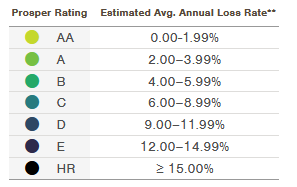




[Learn about Prosper's loan system](https://www.prosper.com/)

## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [22]:
df_loan = pd.read_csv('ProsperLoanData.csv')

In [23]:
sum(df_loan.isna().any())

43

In [24]:
df_loan.isna().any().any()

True

In [ ]:
df_loan.head()

In [ ]:
df_loan.info()

In [ ]:
sum(df_loan.duplicated())

In [25]:
df_loan.isna().sum()

ListingKey                         0
ListingNumber                      0
ListingCreationDate                0
CreditGrade                    84984
Term                               0
                               ...  
PercentFunded                      0
Recommendations                    0
InvestmentFromFriendsCount         0
InvestmentFromFriendsAmount        0
Investors                          0
Length: 81, dtype: int64

In [ ]:
df_loan.describe()

In [ ]:
df_loan.shape

### Data Issues
    1. There alot of missing values especially in "CreditGrade" column.
    2. Some columns name aren't proper e.g "ProsperRating (numeric)".
    3. Inconsistent data in the "DateCreditPulled" column.
    4. Date column are not in datetime format.

### The Clean-up
To Clean up this Qualty and Tidiness issues, we are going to
1. Load only columns necessary for this analysis to a new dataframe called "df".
2. Drop rows with missing values and columns with inconsistent data.
3. Change date column to appropriate type (datetime).

In [27]:
#Load only Relevant (selected) fields
fields=['Term','BorrowerAPR','BorrowerRate','ProsperRating (numeric)','ProsperRating (Alpha)','ProsperScore','Occupation',
        'EmploymentStatus','IsBorrowerHomeowner','CurrentlyInGroup','CurrentCreditLines',
       'TotalCreditLinespast7years','TotalInquiries','AmountDelinquent','DelinquenciesLast7Years',
       'AvailableBankcardCredit','DebtToIncomeRatio','LoanStatus','IncomeRange','LoanNumber','LoanOriginalAmount',
       'LoanOriginationDate','LoanOriginationQuarter','MonthlyLoanPayment','PercentFunded','Recommendations',
       'InvestmentFromFriendsCount','InvestmentFromFriendsAmount','Investors']

df = pd.read_csv('ProsperLoanData.csv', skipinitialspace=True, usecols=fields)

In [28]:
# Drop rows with missing value
df.dropna(inplace=True)

In [29]:
# Rename some columns
df.rename(columns = {'ProsperRating (numeric)':'ProsperRatingNumeric','ProsperRating (Alpha)':'ProsperRatingAlpha'}, inplace = True)

In [30]:
# Convert date fields to datetime format
df['LoanOriginationDate'] = pd.to_datetime(df['LoanOriginationDate'])

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76224 entries, 1 to 113936
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Term                         76224 non-null  int64         
 1   LoanStatus                   76224 non-null  object        
 2   BorrowerAPR                  76224 non-null  float64       
 3   BorrowerRate                 76224 non-null  float64       
 4   ProsperRatingNumeric         76224 non-null  float64       
 5   ProsperRatingAlpha           76224 non-null  object        
 6   ProsperScore                 76224 non-null  float64       
 7   Occupation                   76224 non-null  object        
 8   EmploymentStatus             76224 non-null  object        
 9   IsBorrowerHomeowner          76224 non-null  bool          
 10  CurrentlyInGroup             76224 non-null  bool          
 11  CurrentCreditLines           76224 non-n

In [6]:
df.shape

(76224, 30)

### What is the structure of your dataset?

Originality the dataset contains a total of 113,937 entries(rows) and 81 colums, 61 columns contains numerical data, while quite a number of rows have missing values. However we find it necessary to work only with 30 relevant columns that are of interest to our analysis and also drop some rows due to missiong values, so, we end up working with 76,224 rows and 30 columns. 

### What is/are the main feature(s) of interest in your dataset?

In this dataset, the major features of interest that we will be focusing on in this analysis to establish relationships and draw insights are:

    1. ProsperRating (numeric)
    2. IsBorrowerHomeowner: A Borrower will be classified as homowner if they have a mortgage on their credit profile.
    3. InvestmentFromFriendsAmount: Dollar amount of investments that were made by friends.
    4. Investors: The number of investors that funded the loan.
    
This will help us see if home owners collects loans more, how likely it is for friend to invest in the loans and if belong to a groups or society has any influence in securing loan.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

 Other features that can help us gain better understanding of these feature of interest includes:

    1. Term: The length of the loan expressed in months.
    2. BorrowerRate: The Borrower's interest rate for this loan. 
    3. ProsperScore: A custom risk score built using historical Prosper data.
    4. Occupation: The Occupation selected by the Borrower at the time they created the listing.
    5. EmploymentStatus: The employment status of the borrower at the time they posted the listing.
    6. CurrentlyInGroup: Specifies whether or not the Borrower was in a group at the time the listing was created.
    7. CurrentCreditLines: Number of current credit lines at the time the credit profile was pulled.
    8. DebtToIncomeRatio: The debt to income ratio of the borrower at the time the credit profile was pulled.
    9. IncomeRange: The income range of the borrower at the time the listing was created.
    10. LoanOriginationQuarter: The quarter in which the loan was originated.
    11. MonthlyLoanPayment: The scheduled monthly loan payment.
    12. PercentFunded: Percent the listing was funded.
    13. Recommendations: Number of recommendations the borrower had at the time the listing was created.
    14. InvestmentFromFriendsCount: Number of friends that made an investment in the loan.


## Univariate Exploration

### Question 1: What Percentage of borrowers are Homeowners?

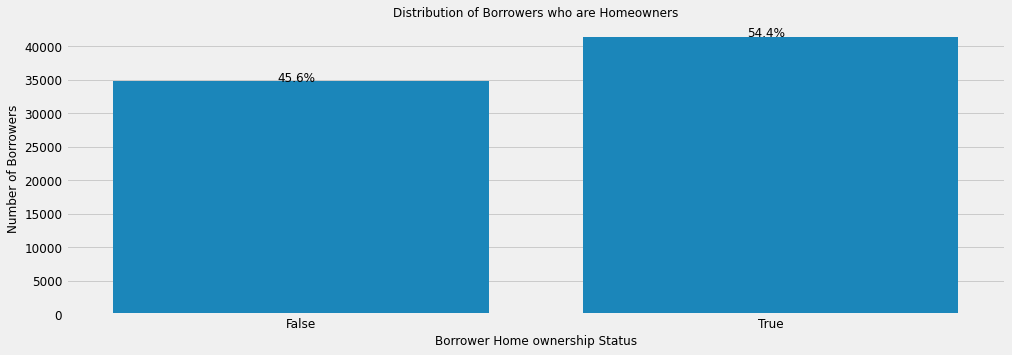

In [65]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

def without_hue(plot, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()
    

base_color = sb.color_palette()[0]
plt.figure(figsize = (15,5))
ax = sb.countplot('IsBorrowerHomeowner', data = df, color=base_color)
plt.title('Distribution of Borrowers who are Homeowners', size = 12)
plt.xticks(size = 12)
plt.xlabel('Borrower Home ownership Status', size = 12)
plt.yticks(size = 12)
plt.ylabel('Number of Borrowers', size = 12);
without_hue(ax,df.IsBorrowerHomeowner);

#### Observation.
It can be seen that most of the borrowers in the prosper loan system are also homeowners, might be why inventestor feel comforcomfortable investing in them we need to investigate this further.

---------------------------------------------------------------------------

### Question 2: How often do people invest in their friends listing?

,InvestmentFromFriendsCount
InvestmentFromFriendsCount,
0,75739
1,430
2,40
3,8
4,2
5,2
6,2
9,1


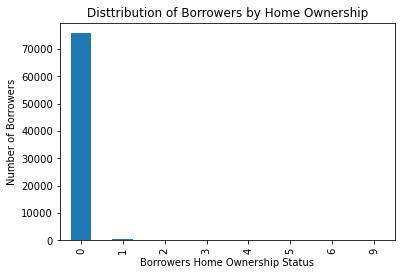

In [9]:
df.groupby(['InvestmentFromFriendsCount'])['InvestmentFromFriendsCount'].count().plot(kind='bar', title='Disttribution of Borrowers by Home Ownership')#.set_label(x_label='Number of Borrowers');
plt.xlabel('Borrowers Home Ownership Status')
plt.ylabel('Number of Borrowers')
df.groupby(['InvestmentFromFriendsCount'])[['InvestmentFromFriendsCount']].count()

#### Observation
We see most of the investments came from non-friends (i.e the 75,739 which is 99% of total listed loans were from non-friend),  could it be that pepeople are more comfortable investing in non-friends than friend? this is a point of further investigations.

------------------------------------------

### Question 3: What is the distribution of borrowers across the Prosper Risk Scores?

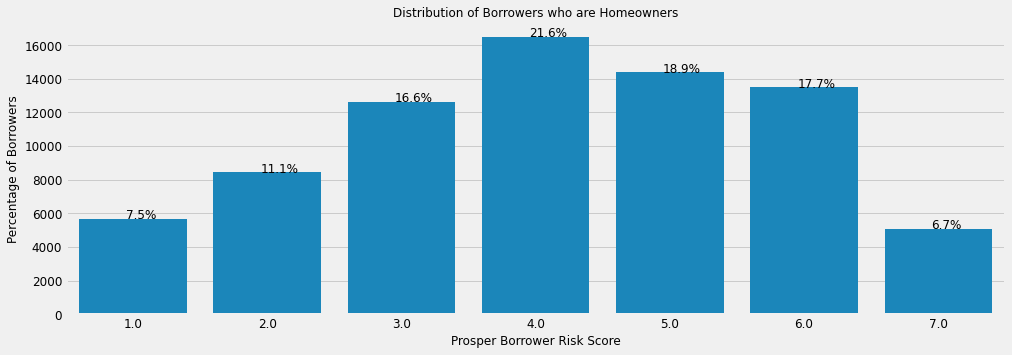

In [66]:
base_color = sb.color_palette()[0]
plt.figure(figsize = (15,5))
ax = sb.countplot('ProsperRatingNumeric', data = df, color=base_color)
plt.title('Distribution of Borrowers who are Homeowners', size = 12)
plt.xticks(size = 12)
plt.xlabel('Prosper Borrower Risk Score', size = 12)
plt.yticks(size = 12)
plt.ylabel('Percentage of Borrowers', size = 12);
without_hue(ax,df.ProsperRatingNumeric);

Text(0.5, 0, 'x-axis limits are changed, and scaled to log-type')

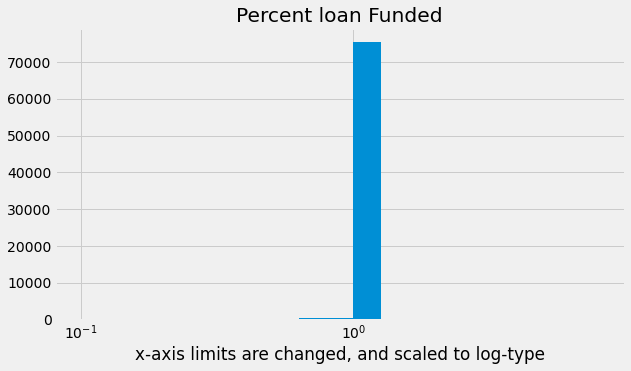

In [64]:
# Axis transformation
# Define the figure size
plt.figure(figsize = [20, 5])

plt.subplot(1, 2, 1)
# Bin size
bins = 10 ** np.arange(-1, 1, 0.1)
plt.hist(data=df, x='PercentFunded', bins=bins);

# The argument in the xscale() represents the axis scale type to apply.
# The possible values are: {"linear", "log", "symlog", "logit", ...}
plt.xscale('log')

# Apply Title & x-axis label
plt.title('Percent loan Funded')
plt.xlabel('x-axis limits are changed, and scaled to log-type')

#### Observation

We see that majority (22%) of the borrowers are on the high risk side (4.0), though not so high.

------------------------

### Question 4: On which day of the week are most loans originated.

<bound method GroupBy.count of <pandas.core.groupby.generic.SeriesGroupBy object at 0x0000021124A61D90>>

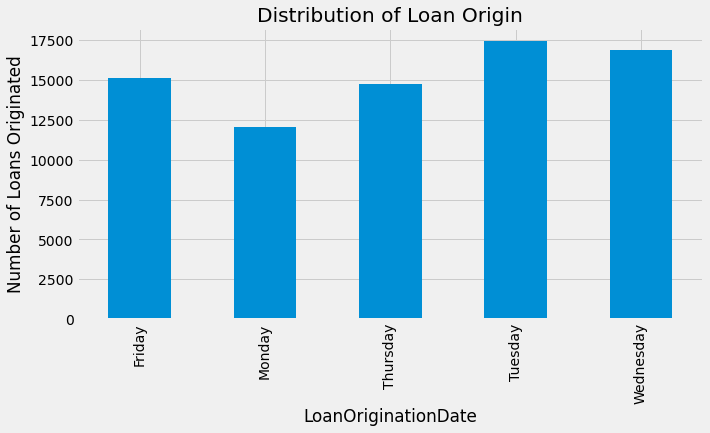

In [83]:
weekdays = df['LoanOriginationDate'].dt.day_name() #get the week day name of each scheduled date
df.groupby(weekdays)['LoanOriginationDate'].count().plot(kind='bar',figsize= (10,5), title='Distribution of Loan Origin').set_ylabel('Number of Loans Originated');
df.groupby(weekdays)['LoanOriginationDate'].count

#### Observation
Most loans are originated on tuesdays

--------------------

### Question 5: What Percentage of the loan listings were funded.

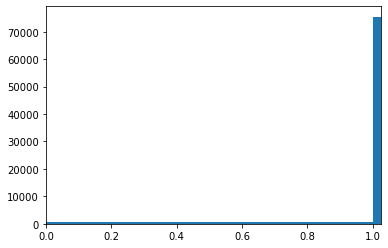

In [43]:
# Create a new figure
fig = plt.figure()

bins = np.arange(0, df['PercentFunded'].max()+4, 1)

# Generate the x-ticks you want to apply
ticks = df['PercentFunded'].unique().tolist()
# Convert ticks into string values, to be displaye dlong the x-axis
labels = ['{}'.format(v) for v in ticks]


# The argument of add_axes represents the dimensions [left, bottom, width, height] of the new axes. 
# All quantities are in fractions of figure width and height.
ax = fig.add_axes([.125, .125, .775, .755])
ax.hist(data=df, x='PercentFunded', bins=bins);

plt.xlim((0,df['PercentFunded'].max()+.0126));


#### Observation
It is evident that most of the loans listed were funded 100%.

------------

### Question 6: What is the distribuiton of borriwers to their Debt to Income ratio?

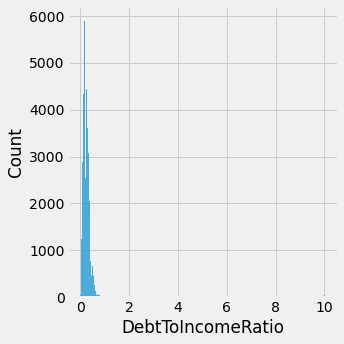

In [95]:
sb.displot(df['DebtToIncomeRatio'], kind='hist', bins=600);

#### Observation
We can see that generally most of the borrowers have a vey low debt to income ratio, which is a good thing.

--------------------------

### Question 7: 

0.3177    2990
0.3199    1329
0.2699    1139
0.1099     835
0.1585     707
          ... 
0.3178       1
0.3094       1
0.3269       1
0.2784       1
0.2665       1
Name: BorrowerRate, Length: 1170, dtype: int64

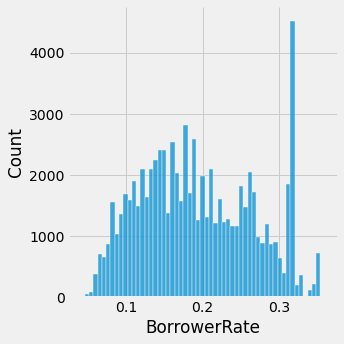

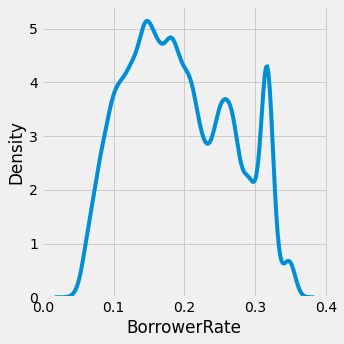

In [111]:
# Define the figure size

sb.displot(df['BorrowerRate'], kind='hist');
sb.displot(df['BorrowerRate'], kind= 'kde');
df['BorrowerRate'].value_counts()

#### Observation
The distribution is almost a normal curve, however we see a spike around the 30% interest rate, which might be considered as high.



>**Rubric Tip**: Visualizations should depict the data appropriately so that the plots are easily interpretable. You should choose an appropriate plot type, data encodings, and formatting as needed. The formatting may include setting/adding the title, labels, legend, and comments. Also, do not overplot or incorrectly plot ordinal data.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [ ]:
sns.kdeplot(data=df, x="Age", hue="No_show", multiple="stack",legend=True).set(title='Distribution of patients by Age and appointment status');

In [ ]:


df.groupby(['Age'])['Age'].count().plot(kind='bar',figsize= (25,8), title='Disttribution of Patient by Age').set_ylabel('Number of Patients');
df.groupby(['Age'])['Age'].count().max()



In [ ]:
#comparing the amount of account owners in both rural and urban areas
sb.catplot(data=df, kind="count", x="location_type", hue="bank_account")

In [ ]:
#plotting a bar plot for cellphone users investigation
sb.catplot(data=df, kind="count", x="cellphone_access", hue="bank_account")

In [ ]:
#Distinguishing account owners from none account owners with histograms
sb.displot(data=df, x="household_size", col="bank_account", kde=True)

In [ ]:
#plotting a density plot for age relating with the bank account variable
sb.displot(data=df, x="age_of_respondent", hue="bank_account", multiple="stack", kind="kde")

In [ ]:
#plotting a bivariate bar plot for relationship_with_head investigation
sb.catplot(data=df, kind="count", x="bank_account", hue="relationship_with_head")

In [ ]:
#plotting a bar plot for education level users investigation
sb.catplot(data=df, kind="count", x="bank_account", hue="education_level")

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

## Conclusions
>You can write a summary of the main findings and reflect on the steps taken during the data exploration.



> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!



## Reference

1. https://www.prosper.com/
2. https://www.investopedia.com/prosper-personal-loans-review-4843741
3. https://www.lawinsider.com/dictionary/loan-listing.
4. https://www.prosper.com/invest/how-to-invest/prosper-ratings/?mod=article_inline